Name : Prawin Gandhi D Project 2 : Deep learning

In [5]:
# import necessary libary for the program

## Objective

 This project based on the classification of image like DOG or CAT  , below dataset can me export from Kaggle dataset for my project

Dataset containing 2 file cat and dog each having 348 item totally 696 data we have in the dataset

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img
from tensorflow.keras.applications import MobileNetV2

from tensorflow.keras.preprocessing import image
import os
import matplotlib.image as mimg
from keras import regularizers

### Just view the random image form both dog and cat dataset

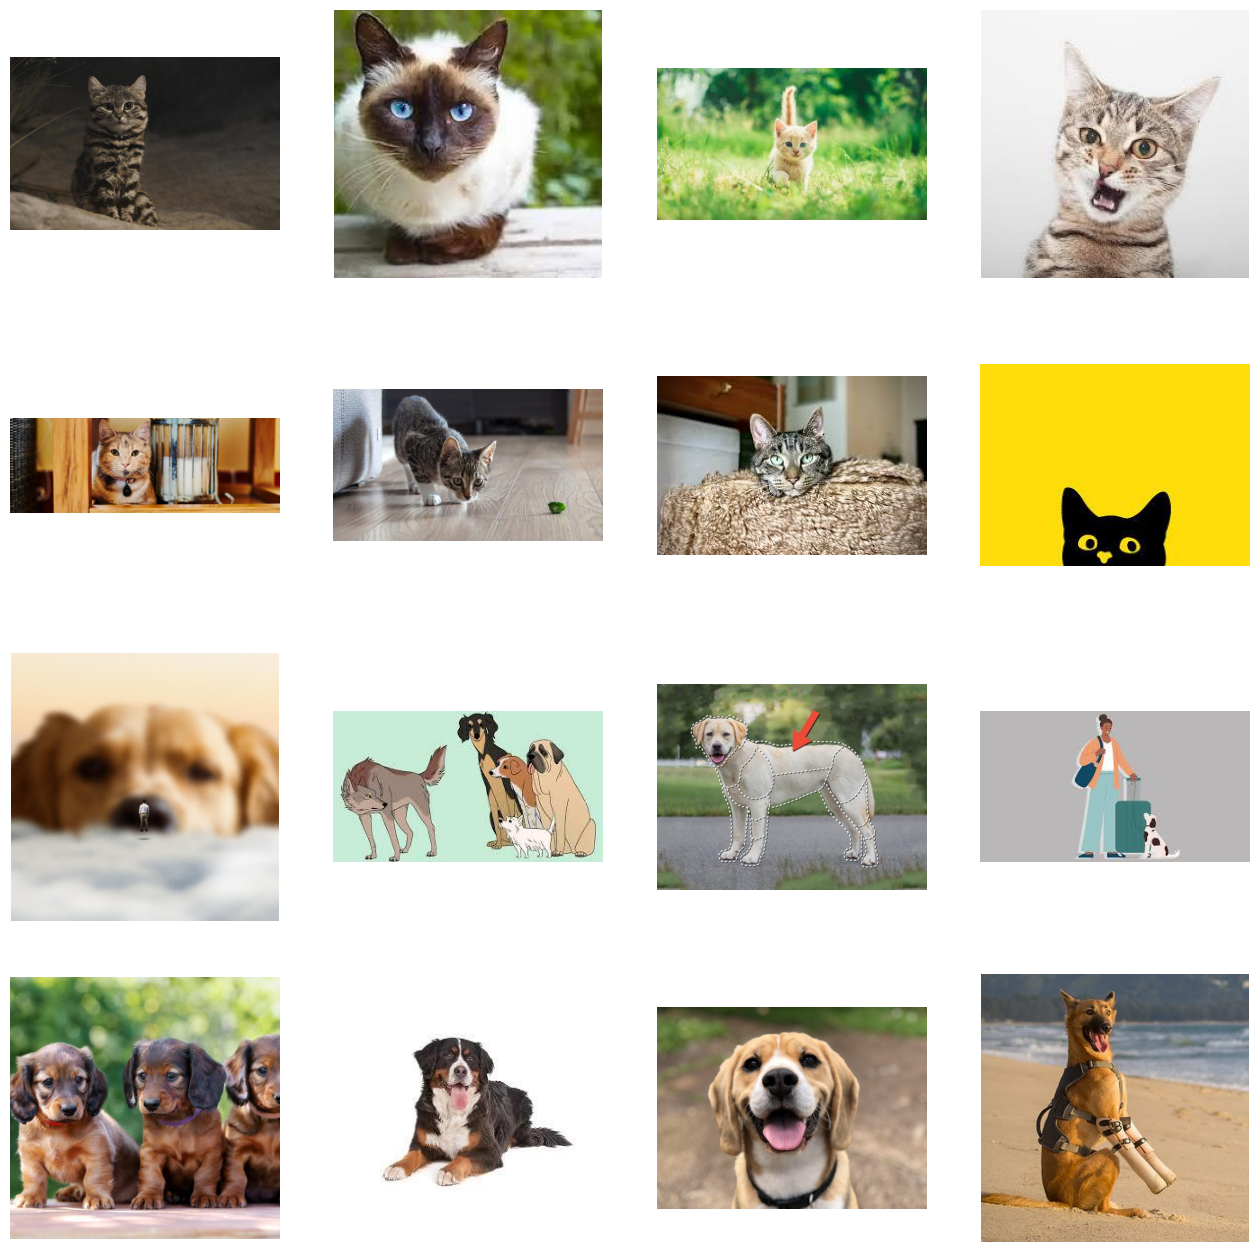

In [7]:
fig=plt.gcf()
fig.set_size_inches(16,16)
cat_image=os.path.join("data/cat")
dog_image=os.path.join("data/dog")
cat_names=os.listdir(cat_image)
dog_names=os.listdir(dog_image)

pix_index=120
cat_images=[os.path.join(cat_image,fname) for fname in cat_names[pix_index-8:pix_index]]
dog_images=[os.path.join(dog_image,fname) for fname in dog_names[pix_index-8:pix_index]]
for i,img_path in enumerate(cat_images + dog_images):
    sp=plt.subplot(4,4,i+1)
    sp.axis('off')
    img=mimg.imread(img_path)
    plt.imshow(img)

plt.show()    


In [8]:
base_dataset="data"

# Data Argumentation and Normalization

Here we made datagen variable for storing the dataargumanted data and then do some normalisation project like RESCALING and we made split on train , validation from the dataset 
For training  allocate 559 images 
For validation allocate 138 images 
Based on 2 classes

In [9]:
train_dataset=ImageDataGenerator(
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255
    
)

In [10]:
val_dataset=ImageDataGenerator(validation_split=0.2,rescale=1./255)

In [11]:
train_ds=train_dataset.flow_from_directory(
    'data',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='training'
    
)

Found 558 images belonging to 2 classes.


In [12]:
val_ds=val_dataset.flow_from_directory(
    'data',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 138 images belonging to 2 classes.


In [13]:
base_model=MobileNetV2(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3)
)

In [14]:
base_model.trainable=False

In [15]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(256,activation='relu')(x)
prediction=Dense(1,activation='sigmoid')(x)

In [16]:
model1=Model(inputs=base_model.input,outputs=prediction)

In [17]:
model1.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [18]:
history=model1.fit(train_ds,validation_data=val_ds,epochs=10)

/opt/homebrew/Cellar/jupyterlab/4.4.6/libexec/lib/python3.13/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 339ms/step - accuracy: 0.8728 - loss: 0.2596 - val_accuracy: 0.9348 - val_loss: 0.1745
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 284ms/step - accuracy: 0.9588 - loss: 0.0977 - val_accuracy: 0.9638 - val_loss: 0.0923
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 283ms/step - accuracy: 0.9767 - loss: 0.0546 - val_accuracy: 0.9638 - val_loss: 0.1174
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 292ms/step - accuracy: 0.9731 - loss: 0.0649 - val_accuracy: 0.9493 - val_loss: 0.2318
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 284ms/step - accuracy: 0.9785 - loss: 0.0615 - val_accuracy: 0.9638 - val_loss: 0.0848
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 290ms/step - accuracy: 0.9749 - loss: 0.0765 - val_accuracy: 0.9493 - val_loss: 0.2291
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 299ms/step - accuracy: 0.9892 - loss: 0.0328 - val_accuracy: 0.9565 - val_loss: 0.1385
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 299ms/step - accuracy: 0.9892 - loss: 0.0340 - val_accuracy: 0.

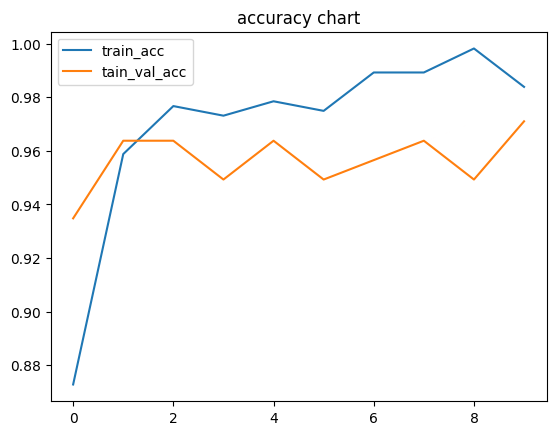

In [19]:
plt.plot(history.history['accuracy'],label='train_acc')
plt.plot(history.history['val_accuracy'],label='tain_val_acc')
plt.legend()
plt.title('accuracy chart')
plt.show()

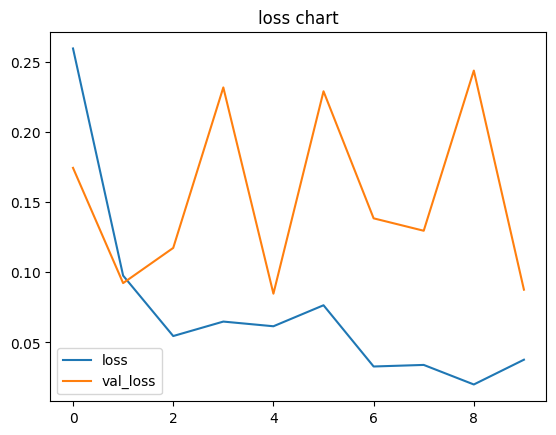

In [20]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.title('loss chart')
plt.show()

In [21]:
def predict_img2(img_path):
    img=tf.keras.preprocessing.image.load_img(img_path,target_size=(224,224))
    plt.imshow(img)
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)

    result=model1.predict(img)
    print('dog' if result>=0.5 else 'cat' )

In [31]:
import os
os.makedirs("modelfile",exist_ok=True)
import pickle

pickle.dump(model1,open('modelfile/model.pkl','wb'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
cat


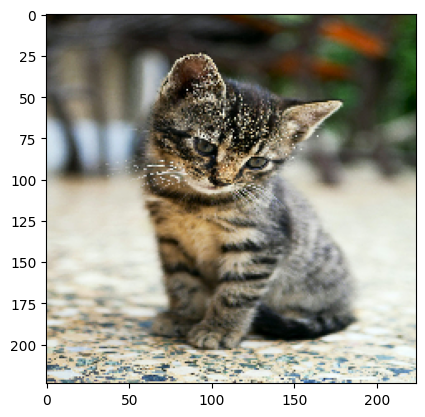

In [32]:
predict_img2('photo-1529778873920-4da4926a72c2-1.jpeg')